<a href="https://colab.research.google.com/github/Gitau20/Aviva-Sample/blob/main/Binary_Classification_of_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification of Irises**
# 1. Purpose of the text
- Overview of supervised learning (classification problems)
- Use scikit-learn to perform classification
- Make a quick comparison of the methods

# Learning
Using standard datasets, you will learn the process of solving classification problems and how to use libraries.

# 2. Classification of Irises
We will practice solving classification problems using the iris dataset. The iris dataset consisted of 150 iris plants of three different species collected on the same day in a pasture on the Gaspé Peninsula in Canada. We can set a problem to guess the type of iris from four types of features (explanatory variables). Since we are classifying the types of iris , this type of problem is called a classification problem.

# List of Techniques
We will use scikit-learn to perform learning and estimation using the following methods. We will not go into the details of each method at this stage. We will simply look at how easy it is to use any of them using the library, and how there are differences in the results for each method.

- Recently
- Logistic regression
- SVM
- Decision Tree
- Random Forest

# 3. Classification Problem Flow
First, we will introduce the basic steps of solving classification problems using the nearest neighbor method as an example. In the second half of the assignment, we will use this as a reference to apply other methods.

# Preparation for practice
Since we want to visualize the results for practice purposes, we will use only two of the four features. This will allow us to draw and check a two-dimensional scatter plot. Also, to simplify the problem, we will use only two types of iris. When there are two types of objects to classify, this is called binary classification , and is distinguished from multi-value classification where there are more than two types . The techniques and evaluation methods differ for each. This time, we will first perform the more basic binary classification.

# Task 1: Select features and categories for practice
There are a total of 18 ways to select, but we will practice with the following combinations. After obtaining the iris dataset in the same way as for Iris data analysis, extract these from the data frame
- virginicore, virginica
- sepal_lengthとpetal_length

In [1]:
# Loading Data
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

# Create a DataFrame from the dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 1. Obtaining the virginica and versicolor
iris_binary = iris_df[iris_df['species'].isin(['versicolor', 'virginica'])]

# 2. Obtaining the sepal_lengthとpetal_length with species
iris_combined = iris_binary[['sepal length (cm)', 'petal length (cm)', 'species']]

# Display first few rows
print(iris_combined.head())


    sepal length (cm)  petal length (cm)     species
50                7.0                4.7  versicolor
51                6.4                4.5  versicolor
52                6.9                4.9  versicolor
53                5.5                4.0  versicolor
54                6.5                4.6  versicolor


"Is this a real problem?"

Visualizing results is also useful when solving real problems. However, it is not desirable to limit the number of features used for learning and estimation to just two. For this reason, learning and estimation are performed in multiple dimensions, and feature extraction methods such as principal component analysis are applied only when visualizing. It is also possible to visualize the results using the scatter plot matrix used in Iris data analysis.

# Question 2. Data analysis
First, we will analyze the data, which we did in Iris data analysis, Task 1. By looking at the scatter plot matrix that was output at that time, we can also check the scatter plots for each of the 18 patterns mentioned earlier. Using sepal_length and petal_length, you can see that it is a little difficult to classify virginica from versicolor.

As a review, we will display a scatter plot, boxplot, and violinplot of the extracted data here.

"Is this a real problem?"

Based on the results of this data analysis, we will perform feature engineering as preprocessing.

This time we extracted sepal_length and petal_length, but after analyzing it, we can say that we performed preprocessing to make the problem a little more difficult.

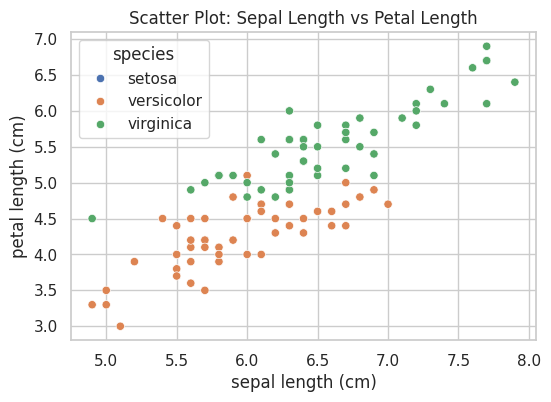

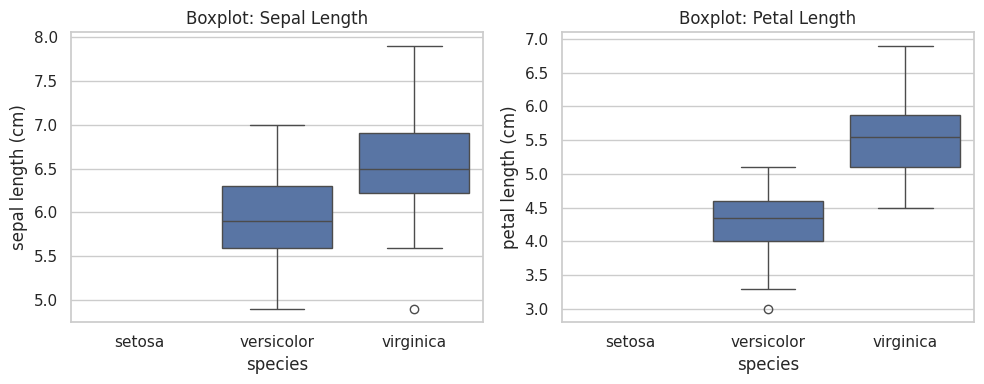

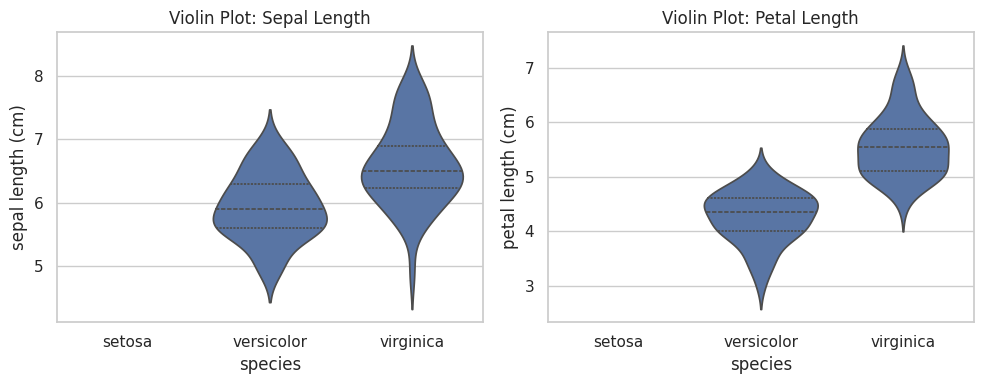

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Set plot style
sns.set(style="whitegrid")

# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=iris_combined, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.show()

# Boxplot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=iris_combined, x='species', y='sepal length (cm)')
plt.title("Boxplot: Sepal Length")

plt.subplot(1, 2, 2)
sns.boxplot(data=iris_combined, x='species', y='petal length (cm)')
plt.title("Boxplot: Petal Length")
plt.tight_layout()
plt.show()

# Violin Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.violinplot(data=iris_combined, x='species', y='sepal length (cm)', inner="quartile")
plt.title("Violin Plot: Sepal Length")

plt.subplot(1, 2, 2)
sns.violinplot(data=iris_combined, x='species', y='petal length (cm)', inner="quartile")
plt.title("Violin Plot: Petal Length")
plt.tight_layout()
plt.show()

# Pretreatment
We will process the data.

# Problem 3. Preprocessing and splitting training data and validation data
As part of the preprocessing, split the training data and validation data. In this example, split the data into 75% training data and 25% validation data.

Attention Points

We have been using Pandas DataFrame up until now for data analysis. However, scikit-learn is designed to use NumPy ndarray. Therefore, let's convert to ndarray at this stage. Store the features (explanatory variables) in an ndarray called X, and the correct answer (objective variable) in an ndarray called y.

Reasons for splitting

The goal of a classification problem is to correctly classify unknown data. To check whether this goal has been achieved, some of the data for which the answer is known is actually left unused for learning. Estimations are made using this data that was not used for learning, and verification is performed using the index values ​​obtained from it. The data used for learning is the training data, and the data used for verification is the verification data, generally in a ratio of about 7:3 to 8:2.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode species labels into 0 (versicolor) and 1 (virginica)
label_encoder = LabelEncoder()
iris_combined['species'] = label_encoder.fit_transform(iris_combined['species'])

# Split the data into features (X) and target (y) as ndarrays
X = iris_combined[['sepal length (cm)', 'petal length (cm)']].values
y = iris_combined['species'].values

# Split data into 75% training and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Check the shape of splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (75, 2)
X_test shape: (25, 2)
y_train shape: (75,)
y_test shape: (25,)


<ipython-input-3-d7cddae34974>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_combined['species'] = label_encoder.fit_transform(iris_combined['species'])


# Problem 4: Preprocessing and standardization
Processing is performed to improve classification accuracy. The appropriate method varies depending on the method, but here we will use standardization as an example.

The standardization library " StandardScaler " is also available in scikit-learn.

Attention Points

Standardization fitis performed on the training data, and on both the training and validation data transform. Since the validation data is a substitute for unknown data that does not exist in the learning stage, it should not be used to calculate the mean or standard deviation for standardization. Also, since this is a classification problem, there is no need to standardize the labels.

《What preprocessing is done in real problems?》

It is unlikely that a dataset like the Iris dataset will be provided in a clean and easy-to-use state. Various processing will be required while conducting the analysis. For example, after checking the missing values ​​as in Task 2 of Week 3, we will also complement the missing values ​​in some cases.We will also check for outliers and organize multiple datasets.

In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize Scaler
scaler = StandardScaler()
# Fit on training data and transform on both the training and validation data
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Print Transformation
print("Mean of standardized training data (should be ~0):", X_train_std.mean(axis=0))
print("Std of standardized training data (should be ~1):", X_train_std.std(axis=0))

Mean of standardized training data (should be ~0): [2.12274642e-15 1.63128770e-15]
Std of standardized training data (should be ~1): [1. 1.]


# Problem 5: Learning and estimation
We will train using the nearest neighbor method (k-nearest neighbors, k-nn).  The input here is the training data.
After training is complete, predictfeed the validation data to the method and perform estimation.

There are multiple parameters, but we won't focus on understanding them now. The most basic element is n_neighborsthe number of , so let's try multiple of these. Do the default 5, as well as 1 and 3 at a minimum. We'll call the case of 5 the 5-nncase of 3, and 3-nnso on.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Trying k=1,3,5
for k in [1,3,5]:
  # Initializing the classifier
  knn = KNeighborsClassifier(n_neighbors=k)

  # Train on the training data
  knn.fit(X_train_std, y_train)

  # Predict on the validation data
  y_pred = knn.predict(X_test_std)

  # Evaluate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{k}-nn case on validation set: {accuracy:.2f}")

1-nn case on validation set: 0.84
3-nn case on validation set: 0.80
5-nn case on validation set: 0.84


# Question 6: Evaluation
The trained model is evaluated by inputting the features of the validation data and calculating the closeness of the estimated value to the correct value of the validation data.

The metrics used to evaluate binary classification include Accuracy , Precision , Recall , and F-score . To understand what each of these means, we need to look at a confusion matrix .
- Calculate four types of metrics using scikit-learn
- Displaying confusion matrices using scikit-learn
- A brief investigation into the meaning of the four types of index values ​​and a written summary


--- 1-NN Evaluation ---
Accuracy : 0.84
Precision: 0.83
Recall   : 0.83
F1 Score : 0.83

Classification Report:
Confusion Matrix (as numbers):
[[11  2]
 [ 2 10]]


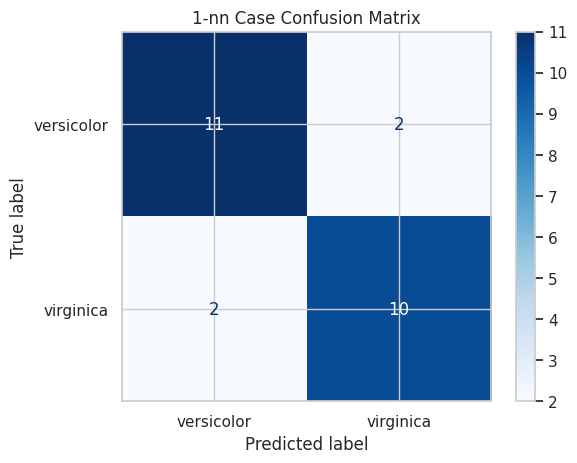


--- 3-NN Evaluation ---
Accuracy : 0.80
Precision: 0.73
Recall   : 0.92
F1 Score : 0.81

Classification Report:
Confusion Matrix (as numbers):
[[ 9  4]
 [ 1 11]]


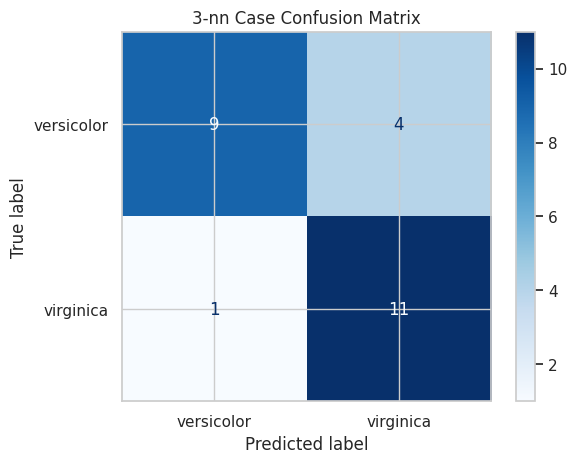


--- 5-NN Evaluation ---
Accuracy : 0.84
Precision: 0.79
Recall   : 0.92
F1 Score : 0.85

Classification Report:
Confusion Matrix (as numbers):
[[10  3]
 [ 1 11]]


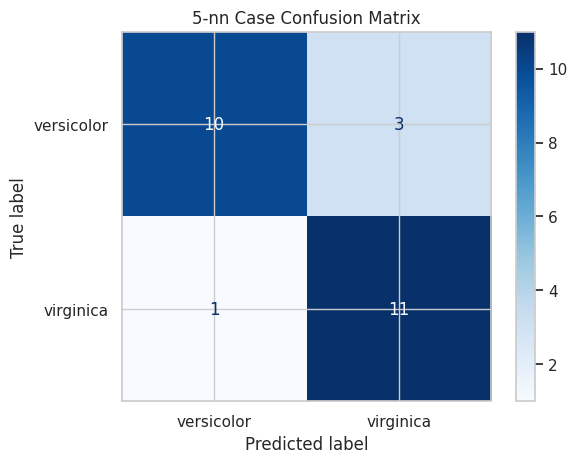

In [6]:
# 1. Calculate four types of metrics
# 2. Display confusion matrices
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
import matplotlib.pyplot as plt
import numpy as np

# Get the full list of class labels from the LabelEncoder
class_labels = list(label_encoder.classes_)

for k in [1, 3, 5]:
    print(f"\n--- {k}-NN Evaluation ---")

    # Initialize and train classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)

    # Predict
    y_pred = knn.predict(X_test_std)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Accuracy : {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall   : {recall:.2f}")
    print(f"F1 Score : {f1:.2f}")
    print("\nClassification Report:")



    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print("Confusion Matrix (as numbers):")
    print(cm)

    # Plot the matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap="Blues")
    plt.title(f"{k}-nn Case Confusion Matrix")
    plt.show()



# 3. A brief investigation into the meaning of the four types of index values ​​and a written summary
1. Accuracy
Accuracy tells us how many predictions the model got right out of all predictions. It is the proportion of total correct predictions (TP + TN) over all predictions. It measures the overall correctness.

Formula:

> Accuracy = (TP + TN)/(TP + TN + FN + FP)

2. Precision
When the model predicts positive (e.g. versicolor), how often is it correct? It measures how many of the positive predictions were actually correct.

Formula:

> Precision = TP/(TP +FP)

3. Recall
Recall measures how many actual positives were correctly identified by the model.

Formula:



> Recall = TP/(TP + FN)

4. F1 Score
F1 Score is the harmonic mean of precision and recall. It balances the two when you need both to be high.

Formula:



> F1 Score = 2*(Precision * Recall)/(Precision + Recall)

In our outcome:

1 NN =

Accuracy : 0.84
Precision: 0.83
Recall   : 0.83
F1 Score : 0.83

3 NN =

Accuracy : 0.80
Precision: 0.73
Recall   : 0.92
F1 Score : 0.81

5 NN =

Accuracy : 0.84
Precision: 0.79
Recall   : 0.92
F1 Score : 0.85















# Problem 7: Visualization
As part of the evaluation, we will perform visualization. In this case, we performed classification using two-dimensional features, so we can visualize it with a scatter plot. Below is a function that draws the decision region for how to divide . Give X and y as training data or validation data.

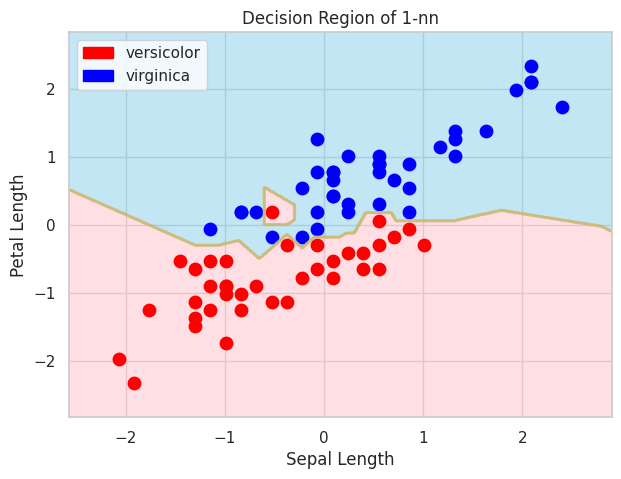

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches # A patch is a 2D artist with a face color and an edge color
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Define the function
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='x label', ylabel='y label', target_names=['versicolor', 'virginica']):

    '''
  This plot depicts the decision region of a model trained on binary classification using two-dimensional features.
  The background color is drawn from the estimates made by the trained model.
  The points on the scatter plot represent the training data or validation data.

  Parameters
  X : ndarray, shape(n_samples, 2)
  Feature
  y : ndarray, shape(n_samples,)
  Label
  model : object
  Input the instance of the trained model
  step : float, (default : 0.1)
  Set the interval for calculating the estimated value
  title : str
  Specify the title of the graph
  xlabel, ylabel : str
  Specify the axis label text
  target_names= : list of str
  Specify the list of legends

  '''
    # Setting colors
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # Create mesh grid
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step)
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # Plot
    plt.figure(figsize=(7, 5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_color), alpha=0.5)
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class - 1, colors='y', linewidths=2, alpha=0.7)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y == target][:, 0], X[y == target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.show()

# Step 2: Train and visualize 1-NN
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train_std, y_train)

# Visualize decision region
decision_region(
    X_train_std, y_train,
    model=knn_1,
    title='Decision Region of 1-nn',
    xlabel='Sepal Length',
    ylabel='Petal Length',
    target_names=['versicolor', 'virginica']
)


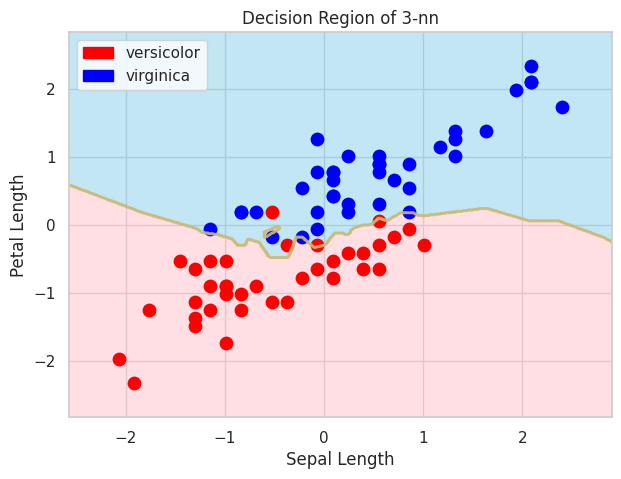

In [8]:
# Step 2: Train and visualize 3-NN
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_std, y_train)

# Visualize decision region
decision_region(
    X_train_std, y_train,
    model=knn_3,
    title='Decision Region of 3-nn',
    xlabel='Sepal Length',
    ylabel='Petal Length',
    target_names=['versicolor', 'virginica']
)

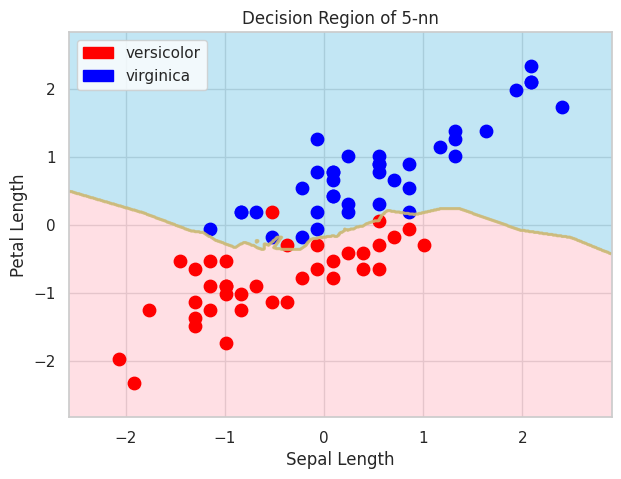

In [9]:
# Step 2: Train and visualize 5-NN
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train_std, y_train)

# Visualize decision region
decision_region(
    X_train_std, y_train,
    model=knn_5,
    title='Decision Region of 5-nn',
    xlabel='Sepal Length',
    ylabel='Petal Length',
    target_names=['versicolor', 'virginica']
)

Trying to compress all the three k plots into one.

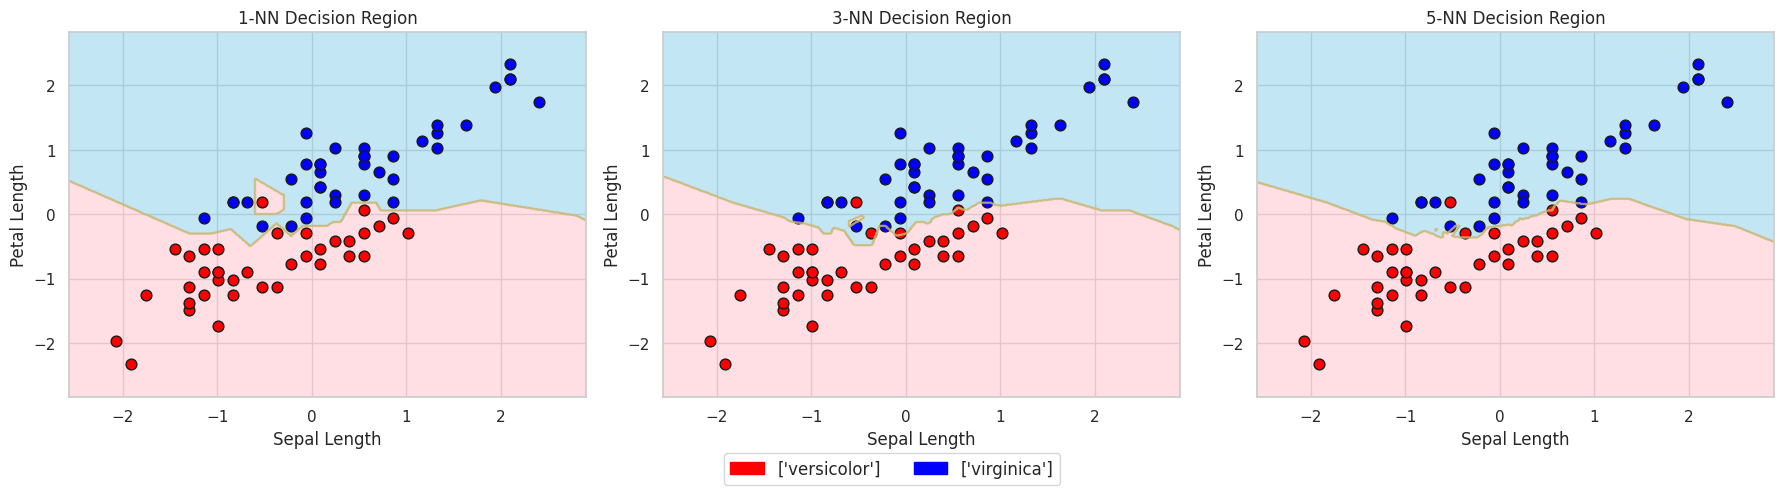

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Decision region plotting function for subplot
def decision_region_subplot(ax, X, y, model, title, target_names=['versicolor', 'virginica'], step=0.01):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step)
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    ax.set_title(title)
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Petal Length')
    ax.contourf(mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_color), alpha=0.5)
    ax.contour(mesh_f0, mesh_f1, y_pred, n_class - 1, colors='y', linewidths=1.5, alpha=0.6)

    for i, target in enumerate(np.unique(y)):
        ax.scatter(X[y == target][:, 0], X[y == target][:, 1], s=60, color=scatter_color[i], label=target_names[i], edgecolor='k', marker='o')

# Plot side-by-side for k = 1, 3, 5
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate([1, 3, 5]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    decision_region_subplot(axes[i], X_train_std, y_train, knn, title=f"{k}-NN Decision Region", target_names=['versicolor', 'virginica'])

# Unified legend (optional)
handles = [mpatches.Patch(color='red', label=['versicolor']),
           mpatches.Patch(color='blue', label=['virginica'])]
fig.legend(handles=handles, loc='lower center', ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


# Improved methodology
In a real problem, we would improve the methodology based on indicator values ​​and visualization.

# 4. Comparison of methods
The basic flow is similar for other methods. Other methods also involve the process from learning to visualization.

# Problem 8: Learning other methods
We will train, estimate, evaluate, and visualize all of the methods below. Then, summarize the metrics in a table. Use the table and the decision regions to briefly discuss the results. After, state which method was good at which metrics and what the decision regions were like.

- Nearest Neighbor Method
- Logistic regression
- SVM
- Decision Tree
- Random Forest

There are arguments (hyperparameters) that need to be adjusted, but we will not cover them in this project. First, run it with the default values.
"Is this a real problem?"

Adjusting hyperparameters is a process called parameter tuning , and one method for this is grid search.


--- Nearest Neighbor ---
Accuracy: 0.84
Precision: 0.79
Recall: 0.92
F1 Score: 0.85


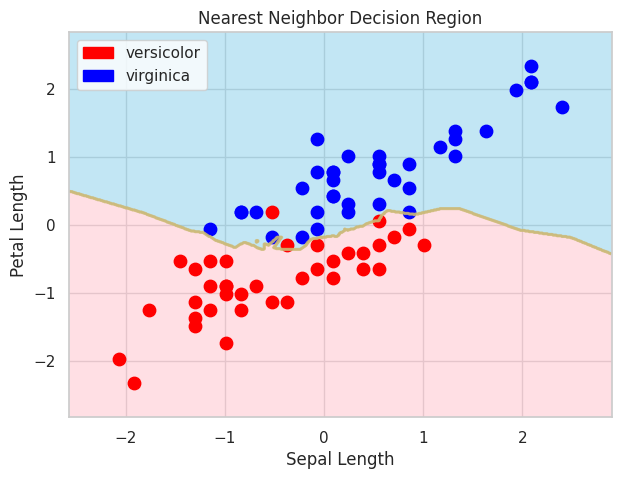


--- Logistic Regression ---
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


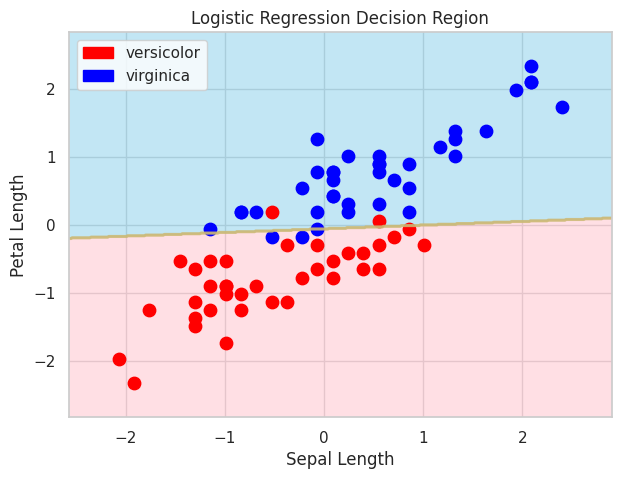


--- SVM ---
Accuracy: 0.88
Precision: 0.85
Recall: 0.92
F1 Score: 0.88


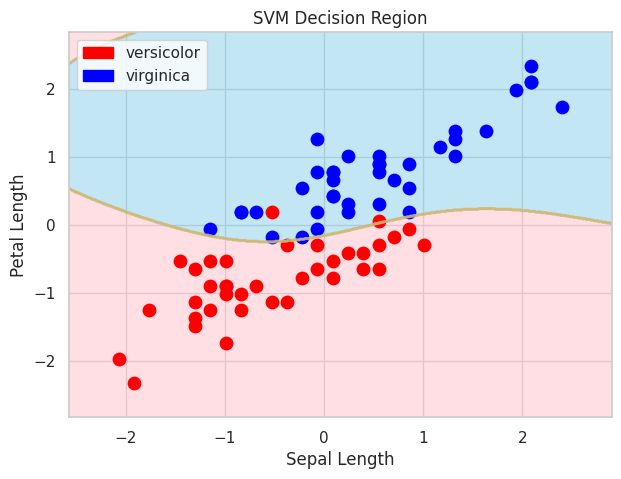


--- Decision Tree ---
Accuracy: 0.84
Precision: 0.83
Recall: 0.83
F1 Score: 0.83


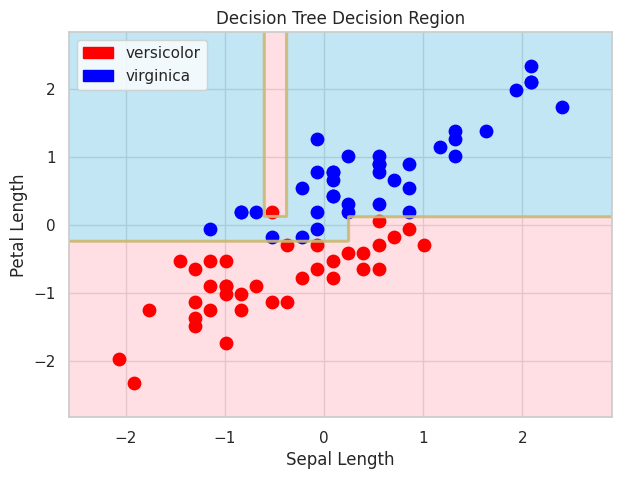


--- Random Forest ---
Accuracy: 0.88
Precision: 0.85
Recall: 0.92
F1 Score: 0.88


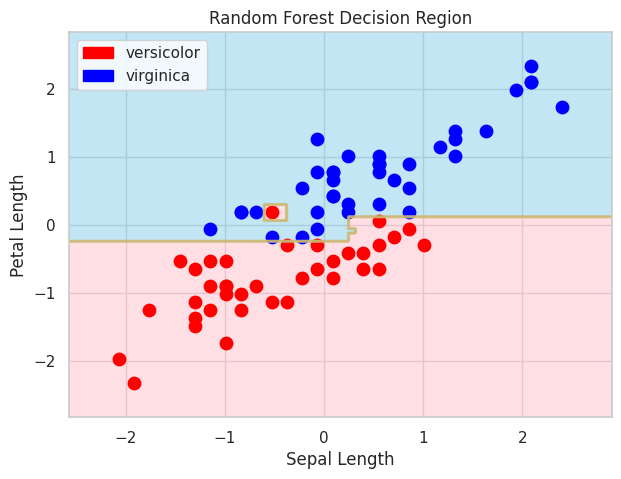

In [11]:
# 1. train, estimate, evaluate, and visualize all of the methods
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Nearest Neighbor': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = []

for model_name, model in models.items():
    print(f"\n--- {model_name} ---")

    # Train
    model.fit(X_train_std, y_train)

    # Predict
    y_pred = model.predict(X_test_std)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    # Append results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    # Visualize
    decision_region(
        X_train_std, y_train,
        model=model,
        title=f'{model_name} Decision Region',
        xlabel='Sepal Length',
        ylabel='Petal Length',)

In [12]:
# 2. summarize the metrics in a table
import pandas as pd
results_df = pd.DataFrame(results)
print('\nSummary Table:')
print(results_df)


Summary Table:
                 Model  Accuracy  Precision    Recall  F1 Score
0     Nearest Neighbor      0.84   0.785714  0.916667  0.846154
1  Logistic Regression      0.92   0.916667  0.916667  0.916667
2                  SVM      0.88   0.846154  0.916667  0.880000
3        Decision Tree      0.84   0.833333  0.833333  0.833333
4        Random Forest      0.88   0.846154  0.916667  0.880000


Using the table and the decision regions to briefly discuss the results:
# Comparison
Accuracy: Logistic Regression (0.92) correctly predicted the most samples overall.

Precision: Logistic Regression (0.92) very few false positives; highly reliable when it predicts positive.

Recall: Nearest Neighbor, Logistic Regression, SVM, Random Forest (0.92 or ~0.92) these models captured most true positives effectively.

F1 Score: Logistic Regression (0.92) which has the best balance of precision and recall.

1. Nearest Neighbours has an irregular decision boundary. It performed well but slightly less stable than others.
2. Logistic Refression displays a linear decision boundary. Has very clean separation between the classes and is the best performer across all metrics.
3. SVM boundary is slightly curved. It maximizes the margin between classes. Performs really well especially in recall and F1 score.
4. Decision Tree is blocky, axis-aligned decision regions. Captures more complex patterns but can overfit small variations. Balanced performance but not the best in any metrics.
5. Random Forest is a smoothed version of decision tree boundaries due to ensemble averaging. Tt has good generalization with strong performance across all metric  

In summary, the method that was good at particular metrics and  the decision regions were like:

Logistic Regression was the most effective overall, especially in linearly separable data, with top scores in accuracy, precision, recall, and F1 score.

Random Forest and SVM provided similarly strong and stable results with well-formed decision regions.

Decision Tree was decent but slightly less robust, possibly overfitting some parts of the data.

k-NN performed well, but the jagged decision boundaries suggest potential sensitivity to noise.

# Question 9: (Advanced Task) Comparison of Standardization and Non-Standardization
Standardization was performed as a preprocessing step, but what kind of results would you get if you did not do this? Please create a table of index values ​​and a diagram of the decision region for each method, and compare and discuss the results. In your discussion, please include the significance of standardization as a preprocessing step for machine learning.



In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load iris dataset and create a binary classification problem
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [0,2]]  # using sepal length and petal length (2 features)
y = iris.target

# Binary classification (only use classes 1 and 2 for clarity)
X = X[y != 0]
y = y[y != 0]
y = y - 1  # Relabel: class 1 -> 0, class 2 -> 1

# Split without standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models to evaluate
models = {
    "Nearest Neighbor": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Function to evaluate models
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0)
    }

# Evaluate each model without standardization
results_nonstd = [evaluate_model(name, model, X_train, y_train, X_test, y_test)
                  for name, model in models.items()]

# Compile into DataFrame
df_nonstd_results = pd.DataFrame(results_nonstd)
df_nonstd_results.sort_values(by="F1 Score", ascending=False, inplace=True)
df_nonstd_results.reset_index(drop=True, inplace=True)
df_nonstd_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.866667,0.846154,0.846154,0.846154
1,SVM,0.866667,0.909091,0.769231,0.833333
2,Nearest Neighbor,0.833333,0.900000,0.692308,0.782609
3,Decision Tree,0.833333,0.900000,0.692308,0.782609
4,Random Forest,0.800000,0.888889,0.615385,0.727273


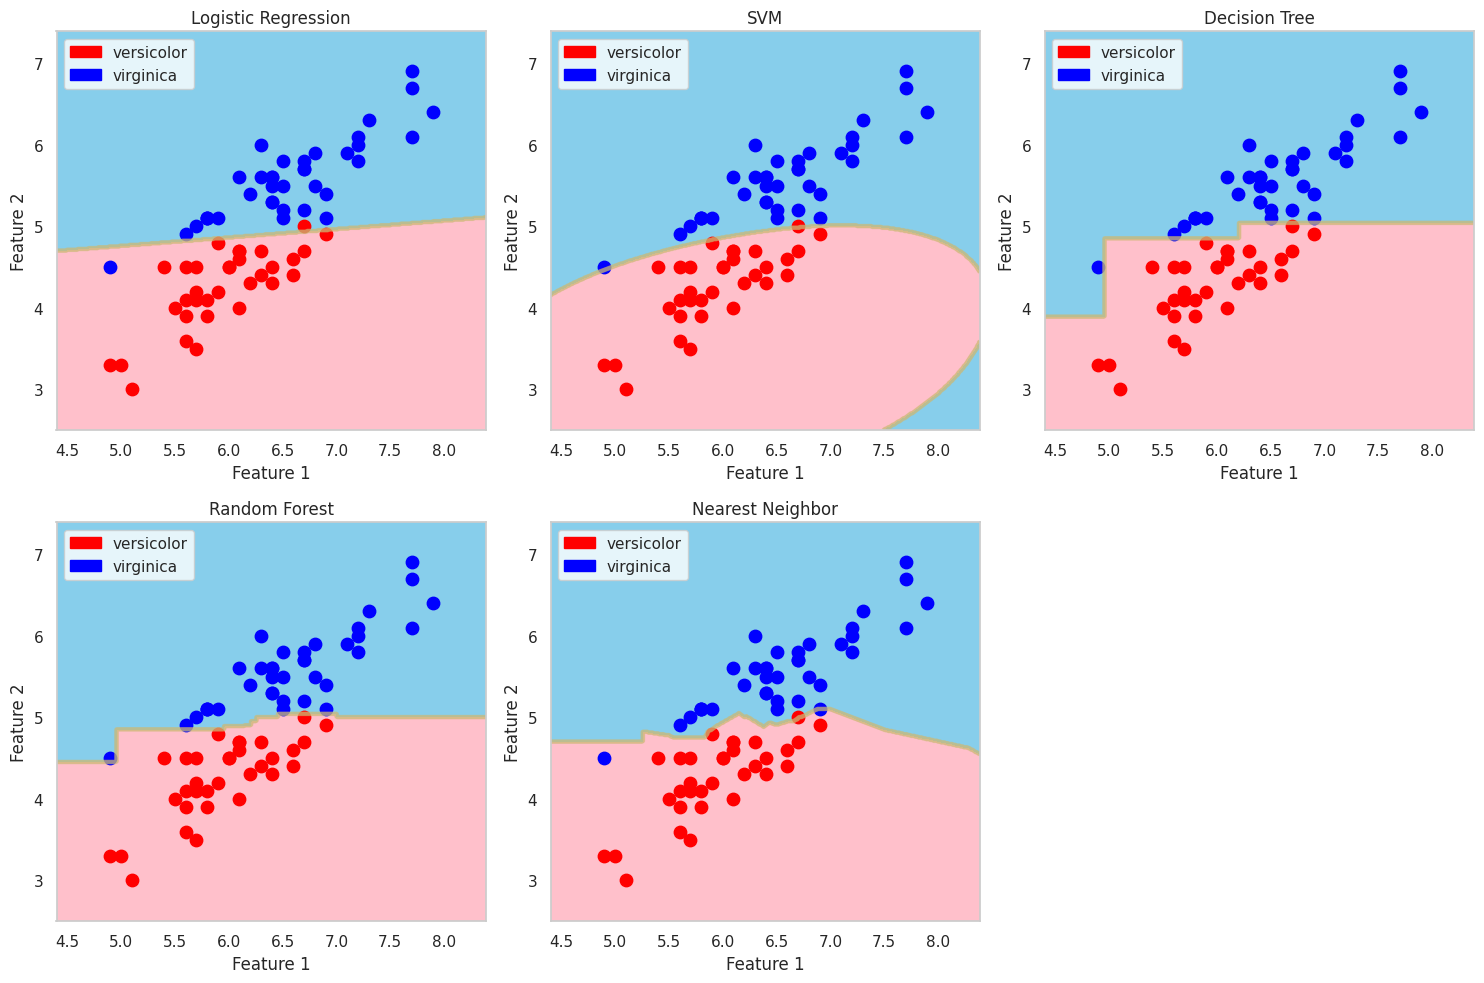

In [14]:
# Reuse the decision_region function
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step)
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class - 1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y == target][:, 0], X[y == target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Nearest Neighbor": KNeighborsClassifier(n_neighbors=3)
}

# Fit and visualize all models without standardization
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    plt.subplot(2, 3, i + 1)
    decision_region(X_train, y_train, model, title=name, xlabel='Feature 1', ylabel='Feature 2', target_names=label_encoder.classes_)
plt.tight_layout()
plt.show()


# Tabular Comparison
Accuracy: Logistic Regression and SVM (0.87) correctly predicted the most samples overall.

Precision: SVM (0.91) very few false positives; highly reliable when it predicts positive.

Recall: Logistic Regression (0.85) this model captured most true positives effectively.

F1 Score: Logistic Regression (0.85) which has the best balance of precision and recall.

# Visual Observations (Decision Regions)
Logistic Regression and SVM show warped, poorly aligned decision boundaries. These models rely on distance or linear separation, which is sensitive to feature scale.

K-Nearest Neighbor (KNN) also struggles without standardized features, leading to irregular regions.

Decision Tree and Random Forest perform well even without standardization. Their decision boundaries remain sharp and rectangular, since they split data based on feature thresholds and aren't scale-sensitive.

Why Standardization Matters
Standardization scales features to the same range (e.g., mean=0, std=1), ensuring models that rely on distance (like KNN and SVM) or gradient descent (like Logistic Regression) perform well.

Without standardization:
- Features with larger ranges dominate the model’s decisions.
- Models like Logistic Regression, SVM, and KNN may yield suboptimal results or distorted decision regions.
- Models like Decision Trees and Random Forests are not affected much because they split based on feature thresholds, not distance.

# Problem 10: (Advanced problem) A highly accurate method using all objective variables
So far, we have reduced the number of iris species and performed binary classification, but we will now perform multi-class classification using all three species. Perform training, estimation, and evaluation to find the most accurate method.

<<Changes due to multi-value>>

For the index values ​​Precision, Recall, and F-value, you need to change the library parameters from the default. We use the concepts of micro-averaging and macro-averaging.

The above function for visualizing the decision regions needs to be rewritten appropriately, below is an example output:

Logistic regression and SVM are methods based on binary classification, and multi-value classification requires ingenuity, but scikit-learn automatically makes the judgment and processes the data, so no changes are required.


KNN Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



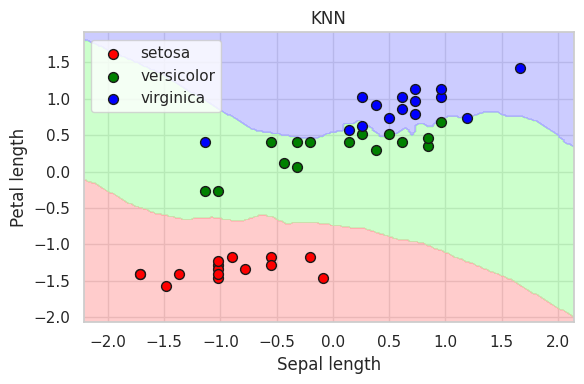


Logistic Regression Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



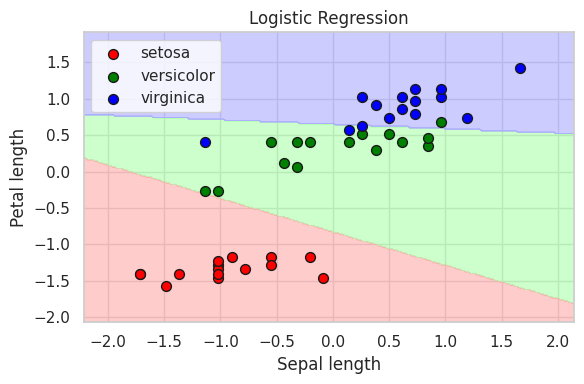


SVM Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



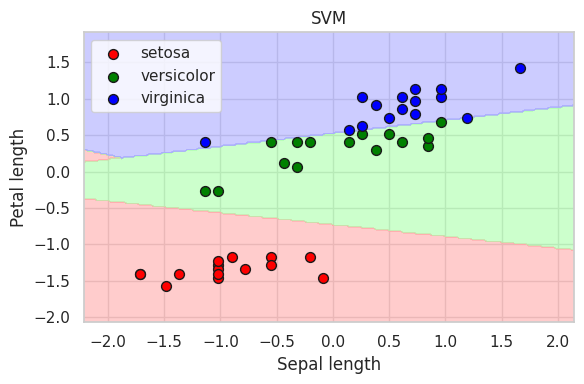


Decision Tree Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



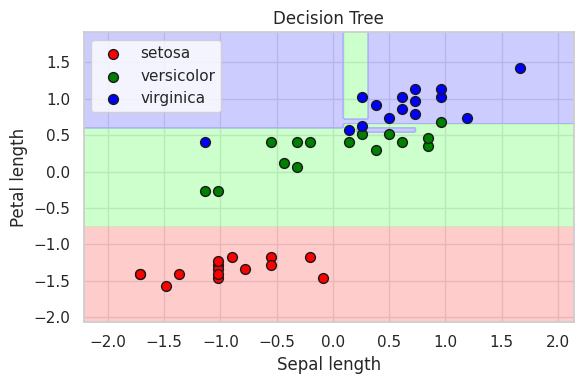


Random Forest Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



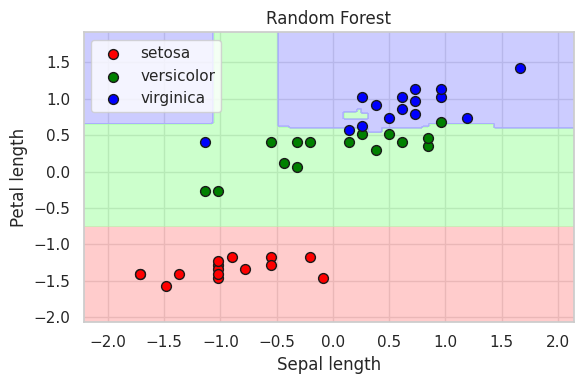


=== Summary Table ===
                 Model  Accuracy  Precision (Macro)  Recall (Macro)  \
0                  SVM  0.977778           0.979167        0.977778   
1        Random Forest  0.933333           0.934524        0.933333   
2                  KNN  0.911111           0.915535        0.911111   
3  Logistic Regression  0.911111           0.915535        0.911111   
4        Decision Tree  0.888889           0.898148        0.888889   

   F1 Score (Macro)  Precision (Micro)  Recall (Micro)  F1 Score (Micro)  
0          0.977753           0.977778        0.977778          0.977778  
1          0.933259           0.933333        0.933333          0.933333  
2          0.910714           0.911111        0.911111          0.911111  
3          0.910714           0.911111        0.911111          0.911111  
4          0.887767           0.888889        0.888889          0.888889  


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load iris data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]  # Use two features: sepal length and petal length
y = iris.target
target_names = iris.target_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Plot decision region function
def plot_decision_region(X, y, model, title, target_names):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']
    h = .02

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    for i, color in zip(np.unique(y), cmap_bold):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=target_names[i], edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Sepal length')
    plt.ylabel('Petal length')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Results list
results = []

# Evaluate all models
for name, model in models.items():
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)

    acc = accuracy_score(y_test, y_pred)

    # Macro metrics (treat all classes equally)
    prec_macro = precision_score(y_test, y_pred, average='macro')
    rec_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')

    # Micro metrics (treat all predictions equally)
    prec_micro = precision_score(y_test, y_pred, average='micro')
    rec_micro = recall_score(y_test, y_pred, average='micro')
    f1_micro = f1_score(y_test, y_pred, average='micro')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision (Macro)': prec_macro,
        'Recall (Macro)': rec_macro,
        'F1 Score (Macro)': f1_macro,
        'Precision (Micro)': prec_micro,
        'Recall (Micro)': rec_micro,
        'F1 Score (Micro)': f1_micro
    })

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=target_names))
    plot_decision_region(X_test_std, y_test, model, title=name, target_names=target_names)

# Final results table
df_results = pd.DataFrame(results)
print("\n=== Summary Table ===")
print(df_results.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))

SVM is clearly the best across the board in all the four metrics in both micro and macro. Which makes it likely the best generalizer for this 2D-feature Iris subset.

Random Forest performs solidly, after SVM.

KNN and Logistic Regression have identical results — which happens sometimes when classes are well-separated.

Decision Tree is the weakest, but not that much. It tends to overfit, especially with low-dimensional data.